<a href="https://colab.research.google.com/github/mateusdevmelo/ML_Deep_Learning/blob/main/3_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Deep Learning

In [3]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

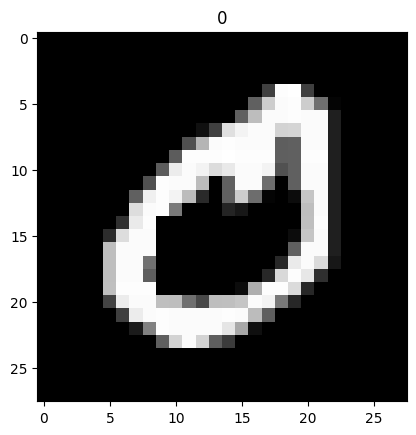

In [5]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [6]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [8]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [9]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [10]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [11]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [16]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 200,
                       validation_data = (X_teste, y_teste))

Epoch 1/200
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0925 - accuracy: 0.9725 - val_loss: 0.0887 - val_accuracy: 0.9770
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9730 - val_loss: 0.0848 - val_accuracy: 0.9762
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9734 - val_loss: 0.0958 - val_accuracy: 0.9741
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0889 - val_accuracy: 0.9756
Epoch 5/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0822 - accuracy: 0.9753 - val_loss: 0.0923 - val_accuracy: 0.9756
Epoch 6/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0828 - accuracy: 0.9747 - val_loss: 0.0962 - val_accuracy: 0.9753
Epoch 7/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9744 - val_loss: 0.0878 - val_

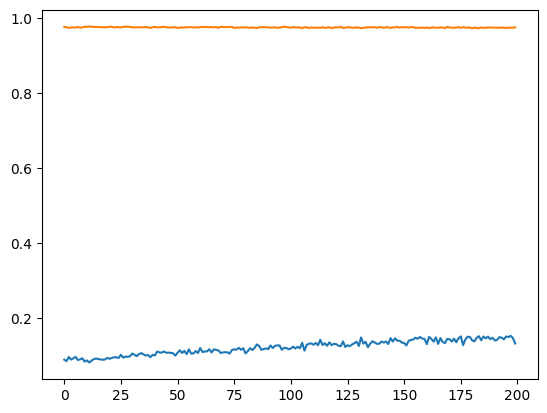

In [17]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [18]:
# Obtenção das previsões
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 0s 1ms/step


array([[1.75889303e-17, 9.69729852e-10, 2.51783067e-10, ...,
        9.99999940e-01, 1.39176483e-14, 1.17761967e-09],
       [3.56555053e-26, 2.03583313e-11, 9.99999940e-01, ...,
        5.81305505e-20, 4.46743719e-22, 4.55150666e-35],
       [9.15553822e-38, 9.99999940e-01, 1.91652834e-17, ...,
        1.65574533e-19, 3.32519336e-20, 1.14126814e-32],
       ...,
       [3.21165978e-19, 5.80711694e-12, 1.20800871e-13, ...,
        2.51172217e-12, 8.27802454e-17, 6.84312768e-14],
       [1.10992300e-21, 4.14652472e-17, 5.90057337e-18, ...,
        1.45792997e-23, 6.64094975e-19, 4.65213470e-16],
       [3.99188195e-21, 1.48966092e-29, 3.77662944e-20, ...,
        1.19003522e-33, 2.15472919e-24, 2.95567530e-33]], dtype=float32)

In [19]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 963,    1,    2,    0,    1,    4,    5,    1,    1,    2],
       [   0, 1123,    1,    0,    1,    2,    3,    0,    5,    0],
       [   1,    2, 1011,    4,    3,    1,    1,    6,    2,    1],
       [   0,    0,    5,  983,    0,   12,    0,    4,    3,    3],
       [   1,    1,    3,    0,  959,    0,    7,    1,    2,    8],
       [   2,    2,    0,    5,    0,  872,    3,    1,    4,    3],
       [   3,    2,    1,    1,    4,    8,  938,    0,    1,    0],
       [   1,    6,   12,    4,    0,    2,    0,  995,    1,    7],
       [   6,    3,    4,    7,    5,    6,    1,    6,  932,    4],
       [   2,    4,    0,   10,    5,    4,    0,    4,    1,  979]])

In [20]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 15ms/step


[4]